# Prepare data set for clustering project

Code below does the bulk of a workflow that may look something like:

- read variable + metadata
- interpolate to chosen grid
- add column to dataframe
- save dataframe to csv
- save metadata to md

_Side note: use PARF_

In [1]:
using MeshArrays
γ=GridSpec("LatLonCap","GRID_LLC90/")
Γ=GridLoad(γ)

lon=[i for i=-179.5:1.0:179.5, j=-89.5:1.0:89.5]
lat=[j for i=-179.5:1.0:179.5, j=-89.5:1.0:89.5]
(f,i,j,w,_,_,_)=InterpolationFactors(Γ,vec(lon),vec(lat))
λ=Dict("f" => f,"i" => i,"j" => j,"w" => w);

In [2]:
using MITgcmTools

fileName="nctiles_climatology/THETA/THETA"
THETA=read_nctiles(fileName,"THETA",γ)
show(THETA)

  data type   = Float64
  cell pos.   = [0.5, 0.5, 0.5]
  tile array  = (5, 50, 12)
  tile sizes  = (90, 270)
                (90, 270)
                (90, 90)
                (270, 90)
                (270, 90)
  grid class  = LatLonCap
  MeshArray   = gcmarray 
  version     = 0.2.10 


In [3]:
n=length(lon[:])
tmp=vec(fill(NaN,(n*12,1)))
for m=1:12
    k=collect(1:n) .+(m-1)*n
    tmp[k] .= Interpolate(THETA[:,1,m],λ["f"],λ["i"],λ["j"],λ["w"])
end

all=Dict("SST" => tmp)

Dict{String,Array{Float64,1}} with 1 entry:
  "SST" => [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  -1.95113, -1.9…

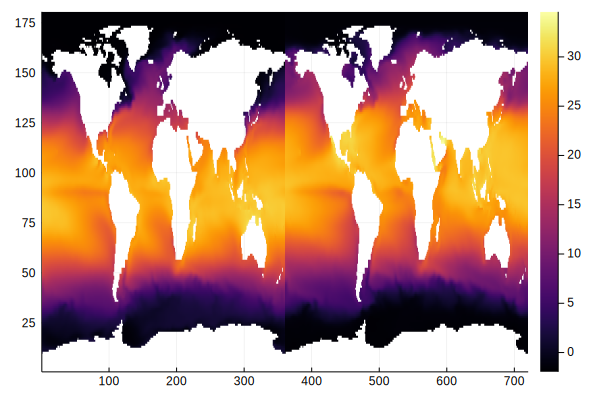

In [4]:
using Plots
SST1=reshape(all["SST"][1:n,1],size(lon))
SST7=reshape(all["SST"][(1:n) .+ n*7,1],size(lon))
heatmap([transpose(SST1) transpose(SST7)])